In [2]:
pip install numpy

/bin/bash: /home/lezchook/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

/bin/bash: /home/lezchook/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 9.3 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install scikit-learn

/bin/bash: /home/lezchook/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install matplotlib

/bin/bash: /home/lezchook/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd

In [51]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
y_train = train_data['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features], dtype='float32')
X_test = pd.get_dummies(test_data[['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch']], dtype='float32')
X_test

,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male
0,892,3,0,0,0.0,1.0
1,893,3,1,0,1.0,0.0
2,894,2,0,0,0.0,1.0
3,895,3,0,0,0.0,1.0
4,896,3,1,1,1.0,0.0
...,...,...,...,...,...,...
413,1305,3,0,0,0.0,1.0
414,1306,1,0,0,1.0,0.0
415,1307,3,0,0,0.0,1.0
416,1308,3,0,0,0.0,1.0


In [53]:
X_train_array = X_train.values
X_test_array = X_test[['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']].values

In [54]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [55]:
y_train_categorical = to_categorical(y_train.values)

In [144]:
model = Sequential([
    Dense(4, input_shape=(5,), activation=tf.keras.activations.relu),
    Dense(2, activation=tf.keras.activations.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.mean_squared_error, metrics=tf.keras.metrics.categorical_accuracy)

In [145]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train_array)

In [146]:
learning = model.fit(X_train_norm[..., np.newaxis], y_train_categorical, epochs=100, validation_split=0.2)

Epoch 1/100
 7/23 [========>.....................] - ETA: 0s - loss: 0.2042 - categorical_accuracy: 0.7321

/home/lezchook/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


23/23 [==============================] - 0s 21ms/step - loss: 0.1836 - categorical_accuracy: 0.7837 - val_loss: 0.1718 - val_categorical_accuracy: 0.8101
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 0.1810 - categorical_accuracy: 0.7837 - val_loss: 0.1693 - val_categorical_accuracy: 0.8101
Epoch 3/100
23/23 [==============================] - 0s 21ms/step - loss: 0.1792 - categorical_accuracy: 0.7851 - val_loss: 0.1674 - val_categorical_accuracy: 0.8101
Epoch 4/100
23/23 [==============================] - 0s 21ms/step - loss: 0.1778 - categorical_accuracy: 0.7851 - val_loss: 0.1658 - val_categorical_accuracy: 0.8101
Epoch 5/100
23/23 [==============================] - 0s 19ms/step - loss: 0.1766 - categorical_accuracy: 0.7851 - val_loss: 0.1648 - val_categorical_accuracy: 0.8101
Epoch 6/100
23/23 [==============================] - 0s 20ms/step - loss: 0.1758 - categorical_accuracy: 0.7851 - val_loss: 0.1636 - val_categorical_accuracy: 0.8101
Epoch 7/100
23/2

23/23 [==============================] - 0s 19ms/step - loss: 0.1604 - categorical_accuracy: 0.7851 - val_loss: 0.1463 - val_categorical_accuracy: 0.8101
Epoch 51/100
23/23 [==============================] - 0s 20ms/step - loss: 0.1602 - categorical_accuracy: 0.7851 - val_loss: 0.1461 - val_categorical_accuracy: 0.8101
Epoch 52/100
23/23 [==============================] - 0s 20ms/step - loss: 0.1601 - categorical_accuracy: 0.7851 - val_loss: 0.1459 - val_categorical_accuracy: 0.8101
Epoch 53/100
23/23 [==============================] - 0s 20ms/step - loss: 0.1599 - categorical_accuracy: 0.7851 - val_loss: 0.1458 - val_categorical_accuracy: 0.8101
Epoch 54/100
23/23 [==============================] - 0s 18ms/step - loss: 0.1598 - categorical_accuracy: 0.7851 - val_loss: 0.1456 - val_categorical_accuracy: 0.8101
Epoch 55/100
23/23 [==============================] - 0s 19ms/step - loss: 0.1597 - categorical_accuracy: 0.7851 - val_loss: 0.1454 - val_categorical_accuracy: 0.8101
Epoch 56/10

23/23 [==============================] - 0s 19ms/step - loss: 0.1554 - categorical_accuracy: 0.7935 - val_loss: 0.1401 - val_categorical_accuracy: 0.8156
Epoch 100/100
23/23 [==============================] - 0s 19ms/step - loss: 0.1553 - categorical_accuracy: 0.7935 - val_loss: 0.1400 - val_categorical_accuracy: 0.8156


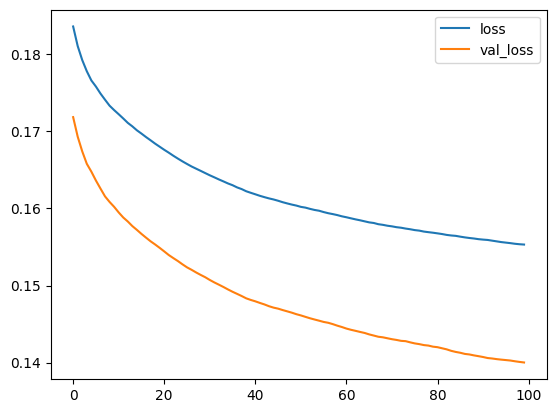

In [147]:
import matplotlib.pyplot as plt

plt.plot(learning.history['loss'], label='loss')
plt.plot(learning.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [148]:
X_test_norm = mms.transform(X_test_array)
prediction = model.predict(X_test_norm[..., np.newaxis])

14/14 [==============================] - 0s 4ms/step


/home/lezchook/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [149]:
labels = np.argmax(prediction, axis=1)

In [150]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': labels})

In [151]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [152]:
output.to_csv('submission.csv', index=False)